# Ozone
- Simple(독립변수 1개) Linear Regression을 구현
- 태양광세기, 바람, 온도를 기반으로 ozone량이 결정


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. data

In [ ]:
data = r'/content/drive/MyDrive/멋사_AI/MLDL/data/ozone.csv'
df_oz = pd.read_csv(data)
df_oz.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [ ]:
df_oz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [ ]:
df_oz.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


### 2. preprocessing

##### 2-1. 결측치 처리

In [ ]:
training_data = df_oz[["Ozone", "Temp"]]
display(training_data)

training_data = training_data.dropna()
display(training_data)

,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
4,NaN,56
...,...,...
148,30.0,70
149,NaN,77
150,14.0,75
151,18.0,76


,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
5,28.0,66
...,...,...
147,14.0,63
148,30.0,70
150,14.0,75
151,18.0,76


### 3. Python으로 구현


In [ ]:
# Training Data Set
t_data = training_data["Ozone"].values.reshape(-1, 1)
x_data = training_data["Temp"].values.reshape(-1, 1)

# Model을 만들기 위한 초기 W, b 설정
W = np.random.rand(1, 1)
b = np.random.rand(1)

# loss function (MSE)
def loss_func(input_data):

    input_w = input_data[0]
    input_b = input_data[1]

    y = np.dot(x_data, input_w) + input_b

    return np.mean(np.power((t_data-y), 2))

# 모델 완성 후 예측 함수
def predict(x):

    return np.dot(x, W) + b

# 수치미분 코드
def numerical_derivative(f, x):

    # f는 미분하려는 다변수 함수
    # x는 모든 변수를 포함하는 ndarray [1.0, 2.0]
    # 리턴되는 결과는 [8.0, 15.0]

    delta_x = 1e-4
    derivative_x = np.zeros_like(x)  # [0.0, 0.0]

    it = np.nditer(x, flags=['multi_index'])  # 변수별 편미분을 해야하므로 iterator

    while not it.finished:

        idx = it.multi_index  # 현재 index 추출 => tuple 형태로 리턴

        tmp = x[idx]  # 현재 index의 값 일시적으로 저장
                      # 이 값을 변경해서 중앙차분 값을 계산
                      # 편미분을 해야하므로 다음 변수 편미분할 때 원래 값으로 복원해야함
        x[idx] = tmp + delta_x
        fx_plus_delta_x = f(x)  # f(x + delta_x)

        x[idx] = tmp - delta_x
        fx_minus_delta_x = f(x)  # f(x - delta_x)

        derivative_x[idx] = (fx_plus_delta_x - fx_minus_delta_x) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()

    return derivative_x

# hyperparameter learning rate 정의
learning_rate = 1e-4

# 학습 진행
for step in range(300000):

    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[0].reshape(-1, 1)
    b = b - derivative_result[1]

    if step % 30000 == 0:
        print(f'W: {W}, b: {b}, loss: {loss_func(input_param)}')

W: [[0.62236265]], b: [0.72256931], loss: 1329.3278416297444
W: [[0.7149539]], b: [-11.58190739], loss: 818.4966086348988
W: [[0.85769565]], b: [-22.86078635], loss: 776.0585353450567
W: [[0.98854814]], b: [-33.20022403], loss: 740.3955556792824
W: [[1.10850166]], b: [-42.67846845], loss: 710.4260490497664
W: [[1.218464]], b: [-51.36725018], loss: 685.2410719099016
W: [[1.31926735]], b: [-59.33232521], loss: 664.0767904495239
W: [[1.41167458]], b: [-66.63397258], loss: 646.2913143203886
W: [[1.49638501]], b: [-73.32745055], loss: 631.3452287784341
W: [[1.57403974]], b: [-79.46341483], loss: 618.7852348033182


[[16.9157766]]


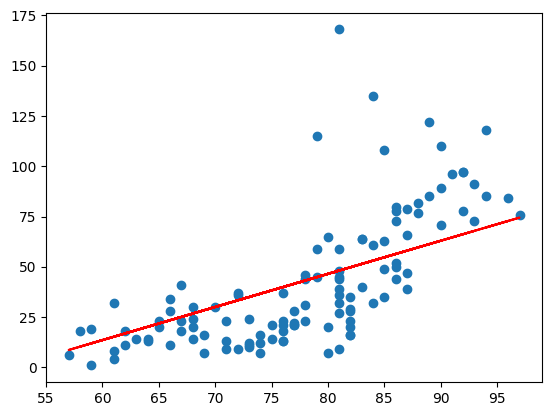

In [ ]:
# 학습 종료 후 예측
# 화씨 온도 62일 때 예측
print(predict(np.array([[62]])))  # [[16.8811574]]

# 이 예측이 맞는가?
plt.scatter(x_data, t_data)
plt.plot(x_data, x_data * W.ravel() + b, color='r')
plt.show()

### 4. Tensorflow keras로 구현

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

In [ ]:
# Training Data Set
t_data = training_data["Ozone"].values.reshape(-1, 1)
x_data = training_data["Temp"].values.reshape(-1, 1)

# Model 생성
model = Sequential()

# layer 생성
model.add(Flatten(input_shape=(1,)))
output_layer = Dense(units=1, activation="linear") # units: 출력 1개, activation="linear": 활성 함수 사용 X
model.add(output_layer)

# model 설정
model.compile(optimizer=SGD(learning_rate=1e-4), loss='mse')

# model 학습
model.fit(x_data, t_data, epochs=2000, verbose=0)

1/1 [==============================] - 0s 77ms/step
[[17.856749]]


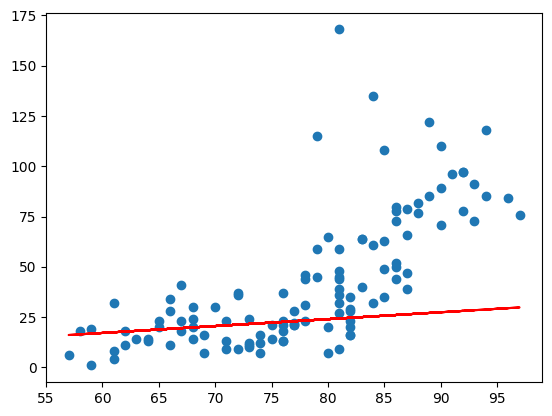

In [ ]:
# 학습이 끝났으니 예측 진행
print(model.predict(np.array([[62]])))  # [[41.442543]]

# 그래프로 확인
# W와 b가 필요 Tensorflow로 구현했으니 output_layer(Dense)에 w, b가 존재
weights, bias = output_layer.get_weights()
plt.scatter(x_data, t_data)
plt.plot(x_data, x_data * weights + bias, color='r')
plt.show()

### 5. sklearn으로 구현

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
# Training Data Set
t_data = training_data["Ozone"].values.reshape(-1, 1)
x_data = training_data["Temp"].values.reshape(-1, 1)

# Model 생성
sklearn_model = linear_model.LinearRegression()

# Model 학습
sklearn_model.fit(x_data, t_data)

# W와 b값 확인
weights = sklearn_model.coef_
bias = sklearn_model.intercept_

[[3.58411393]]


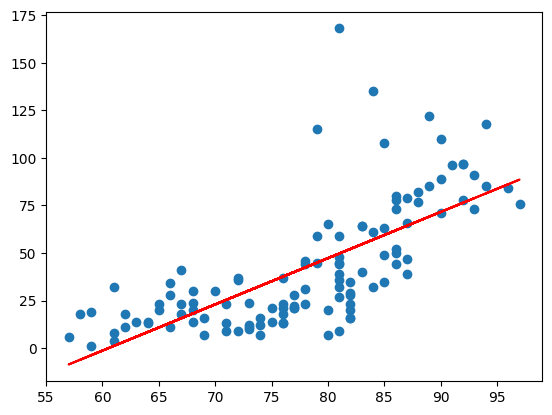

In [ ]:
print(sklearn_model.predict(np.array([[62]])))  # [3.58411393]]

plt.scatter(x_data, t_data)
plt.plot(x_data, x_data * weights + bias, color='r')
plt.show()

# 이상치 탐지
- Tukey's Fences 방식 -> 사분위를 이용
    - Boxplot을 이용해서 data를 사분위 기준 그래프로 표현
    - IQR value: 3사분위 - 1사분위
        - 1사분위 보다 1.5 * IQR value만큼 초과로 작은 값
        - 3사분위 보다 1.5 * IQR value만큼 초과로 큰 값
- 정규분포(Z-score)


### 1. Tukey Fences

8.0
4.5
11.5
7.0
22.0
-6.0
[22.1]
[]
[22.1]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


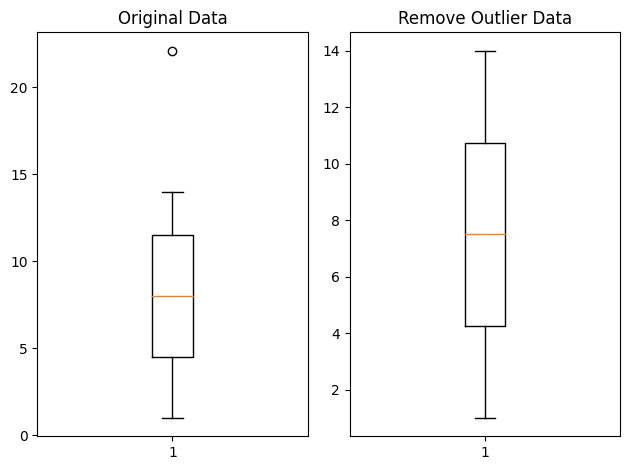

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,22.1])

fig = plt.figure()

fig_1 = fig.add_subplot(1,2,1)
fig_2 = fig.add_subplot(1,2,2)

print(np.median(data))  # 8.0
print(np.percentile(data, 25))  # 1 사분위: 4.5
print(np.percentile(data, 75))  # 3 사분위: 11.5

# IQR value
iqr_value = np.percentile(data, 75) - np.percentile(data, 25)
print(iqr_value)  # 7.0

upper_fence = np.percentile(data, 75) + 1.5 * iqr_value
print(upper_fence)  # 22.0

lower_fence = np.percentile(data, 25) - 1.5 * iqr_value
print(lower_fence)  # -6.0

# 내가 가지고 있는 데이터에 대해 이상치 출력
# boolean indexing
print(data[data > upper_fence])  # 22.1
print(data[data < lower_fence])  # 존재 X
print(data[(data > upper_fence) | (data < lower_fence)])

result_data = data[(data <= upper_fence) & (data >= lower_fence)]
print(result_data)  # 이상치 제거 데이터

fig_1.set_title("Original Data")
fig_1.boxplot(data)

fig_2.set_title("Remove Outlier Data")
fig_2.boxplot(result_data)

plt.tight_layout()
plt.show()


### 2. 정규분포 (Z-score)

In [ ]:
from scipy import stats

In [ ]:
# 우리 데이터에 대한 z-score 값을 각각 구해야 한다.
# 그리고 기준치를 설정한 다음 그 기준치를 넘는 데이터를 이상치로 판별

data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,22.1])

zscore_threshold = 2.0  # 일반적으로 2.0을 많이 사용

z_score = stats.zscore(data)

print(data[z_score > zscore_threshold])
print(data[z_score < -zscore_threshold])
outlier = data[(z_score > zscore_threshold) | (z_score < -zscore_threshold)] # (np.abs(z_score) > zscore_threshold)
print(outlier)


result_data = data[(z_score <= zscore_threshold) & (z_score >= -zscore_threshold)]
print(result_data)

print(np.isin(data, outlier, invert=True))  # invert: boolean mask 반대로
print(data[np.isin(data, outlier, invert=True)])

[22.1]
[]
[22.1]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


# Ozone 데이터 이상치 제거

### 1. Ozone 데이터 이상치 제거

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# data load
data = r'/content/drive/MyDrive/멋사_AI/MLDL/data/ozone.csv'
df_oz = pd.read_csv(data)

# 데이터 추출
training_data = df_oz[["Ozone", "Temp"]]
display(training_data)

# 결측치 제거
training_data = training_data.dropna()
display(training_data)

,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
4,NaN,56
...,...,...
148,30.0,70
149,NaN,77
150,14.0,75
151,18.0,76


,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
5,28.0,66
...,...,...
147,14.0,63
148,30.0,70
150,14.0,75
151,18.0,76


In [ ]:
# 이상치 데이터
zscore_threshold = 2

display(training_data[np.abs(stats.zscore(training_data["Ozone"])) > zscore_threshold])

# 이상치 제거 데이터
training_data = training_data[np.abs(stats.zscore(training_data["Ozone"])) < zscore_threshold]
display(training_data)

,Ozone,Temp
29,115.0,79
61,135.0,84
85,108.0,85
98,122.0,89
100,110.0,90
116,168.0,81
120,118.0,94


,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
5,28.0,66
...,...,...
147,14.0,63
148,30.0,70
150,14.0,75
151,18.0,76


### 2. python 구현

In [ ]:
# Training Data Set
t_data = training_data["Ozone"].values.reshape(-1, 1)
x_data = training_data["Temp"].values.reshape(-1, 1)

# Model을 만들기 위한 초기 W, b 설정
W = np.random.rand(1, 1)
b = np.random.rand(1)

# loss function (MSE)
def loss_func(input_data):

    input_w = input_data[0]
    input_b = input_data[1]

    y = np.dot(x_data, input_w) + input_b

    return np.mean(np.power((t_data-y), 2))

# 모델 완성 후 예측 함수
def predict(x):

    return np.dot(x, W) + b

# 수치미분 코드
def numerical_derivative(f, x):

    # f는 미분하려는 다변수 함수
    # x는 모든 변수를 포함하는 ndarray [1.0, 2.0]
    # 리턴되는 결과는 [8.0, 15.0]

    delta_x = 1e-4
    derivative_x = np.zeros_like(x)  # [0.0, 0.0]

    it = np.nditer(x, flags=['multi_index'])  # 변수별 편미분을 해야하므로 iterator

    while not it.finished:

        idx = it.multi_index  # 현재 index 추출 => tuple 형태로 리턴

        tmp = x[idx]  # 현재 index의 값 일시적으로 저장
                      # 이 값을 변경해서 중앙차분 값을 계산
                      # 편미분을 해야하므로 다음 변수 편미분할 때 원래 값으로 복원해야함
        x[idx] = tmp + delta_x
        fx_plus_delta_x = f(x)  # f(x + delta_x)

        x[idx] = tmp - delta_x
        fx_minus_delta_x = f(x)  # f(x - delta_x)

        derivative_x[idx] = (fx_plus_delta_x - fx_minus_delta_x) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()

    return derivative_x

# hyperparameter learning rate 정의
learning_rate = 1e-4

# 학습 진행
for step in range(300000):

    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[0].reshape(-1, 1)
    b = b - derivative_result[1]

    if step % 30000 == 0:
        print(f'W: {W}, b: {b}, loss: {loss_func(input_param)}')

W: [[0.57173748]], b: [0.13452297], loss: 1212.5722551031597
W: [[0.63283162]], b: [-10.46110078], loss: 454.9298001895614
W: [[0.75645458]], b: [-20.16517882], loss: 423.51468953193216
W: [[0.86968561]], b: [-29.0535178], loss: 397.1591900912446
W: [[0.97339827]], b: [-37.19468993], loss: 375.0484180322282
W: [[1.06839269]], b: [-44.65150317], loss: 356.4987319577784
W: [[1.15540174]], b: [-51.48148572], loss: 340.93659543303704
W: [[1.23509669]], b: [-57.73732989], loss: 327.88084385628525
W: [[1.30809236]], b: [-63.46729861], loss: 316.9278073652825
W: [[1.3749519]], b: [-68.71559773], loss: 307.7388297971858


[[15.52116547]]


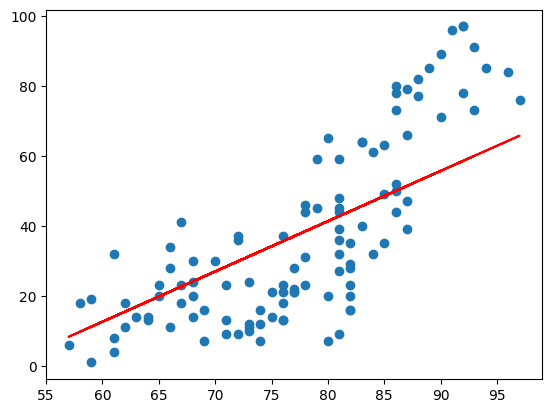

In [ ]:
# 학습 종료 후 예측
# 화씨 온도 62일 때 예측
print(predict(np.array([[62]])))  # [[15.52116547]]

# 이 예측이 맞는가?
plt.scatter(x_data, t_data)
plt.plot(x_data, x_data * W.ravel() + b, color='r')
plt.show()

### 3. Tensorflow keras 구현

In [ ]:
# Training Data Set
t_data = training_data["Ozone"].values.reshape(-1, 1)
x_data = training_data["Temp"].values.reshape(-1, 1)

# Model
model = Sequential()

model.add(Flatten(input_shape=(1,)))

output_layer = Dense(units=1, activation="linear")
model.add(output_layer)

# Model 설정
model.compile(optimizer=SGD(learning_rate=1e-4), loss="mse")

# Model 학습
model.fit(x_data, t_data, epochs=2000, verbose=0)

1/1 [==============================] - 0s 21ms/step
[[25.03648]]


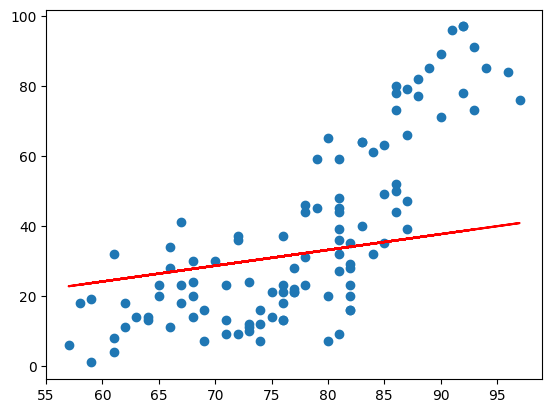

In [ ]:
# 학습이 끝났으니 예측 진행
print(model.predict(np.array([[62]])))  # [[25.03648]]

# 그래프로 확인
# W와 b가 필요 Tensorflow로 구현했으니 output_layer(Dense)에 w, b가 존재
weights, bias = output_layer.get_weights()

plt.scatter(x_data, t_data)
plt.plot(x_data, x_data * weights + bias, color='r')
plt.show()

### 4. sklaern 구현

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
# Training Data Set
t_data = training_data["Ozone"].values.reshape(-1, 1)
x_data = training_data["Temp"].values.reshape(-1, 1)

# Training Data Set
t_data = training_data["Ozone"].values.reshape(-1, 1)
x_data = training_data["Temp"].values.reshape(-1, 1)

# Model 생성
sklearn_model = linear_model.LinearRegression()

# Model 학습
sklearn_model.fit(x_data, t_data)

# W와 b값 확인
coef = sklearn_model.coef_
intercept = sklearn_model.intercept_

[[4.51299041]]


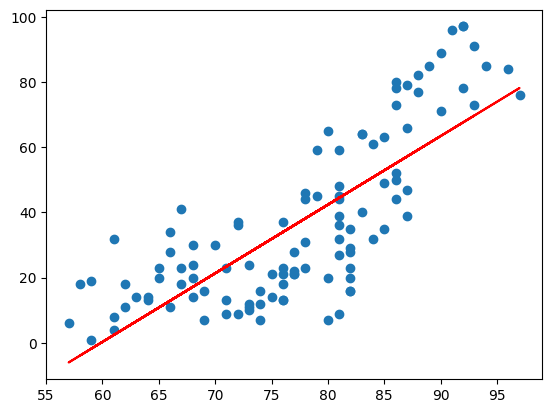

In [ ]:
print(sklearn_model.predict(np.array([[62]])))  # [[4.51299041]]

plt.scatter(x_data, t_data)
plt.plot(x_data, x_data * coef + intercept, color='r')
plt.show()

### 5. 결과 확인

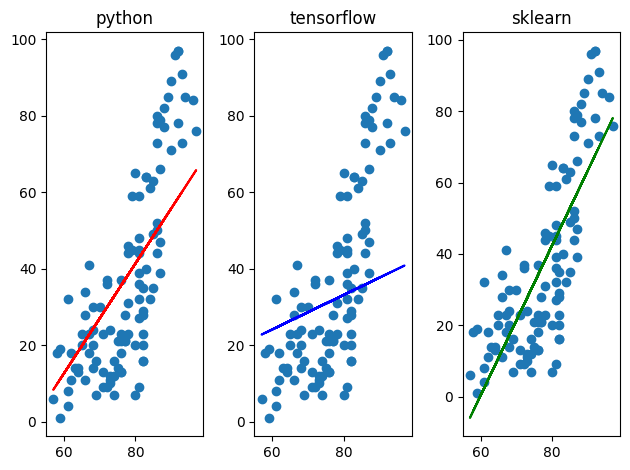

In [ ]:
fig = plt.figure()

fig_python = fig.add_subplot(1,3,1)
fig_tensorflow = fig.add_subplot(1,3,2)
fig_sklearn = fig.add_subplot(1,3,3)

fig_python.set_title("python")
fig_tensorflow.set_title("tensorflow")
fig_sklearn.set_title("sklearn")

fig_python.scatter(x_data, t_data)
fig_python.plot(x_data, x_data * W.ravel() + b, color='r')

fig_tensorflow.scatter(x_data, t_data)
fig_tensorflow.plot(x_data, x_data * weights + bias, color='b')

fig_sklearn.scatter(x_data, t_data)
fig_sklearn.plot(x_data, x_data * coef + intercept, color='g')

plt.tight_layout()
plt.show()

# 정규화 (Normalization)
- Min-Max Normalization(scaling)
    - 정규화를 하는 가장 일반적인 방법
    - scaled = (x-min) / (max - min)